In [1]:
import pandas as pd
import numpy as np

import yfinance as yf
import datetime as dt

from matplotlib import pyplot as plt

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2020,12,31)

In [3]:
# List all relevant stocks
symbols = ['SPY']

In [4]:
df = pd.DataFrame()
# iterate over each symbol
for i in symbols:  
    
    # print the symbol which is being downloaded
    print( str(symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            df = df.append(stock,sort=False)
    except Exception:
        None

0 : SPY,

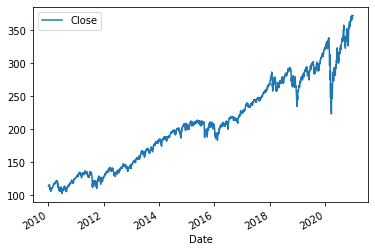

<ipython-input-42-7f0921e9faa3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[str(num_days)+'D Change'] = final_df['Close'] - final_df.loc[:,'Close'].shift(num_days)
<ipython-input-42-7f0921e9faa3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[str(num_days)+'D Change Switch'] = np.where(final_df[str(num_days)+'D Change'] > 0, True, False)
<ipython-input-42-7f0921e9faa3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Close,Name,1D Change,1D Change Switch,Change Percent Value,Change Percent Value Switch,Output
Date,,,,,,,
2020-11-17,360.619995,SPY,-1.950012,False,0.005407,True,1
2020-11-18,356.279999,SPY,-4.339996,False,0.012181,True,1
2020-11-19,357.779999,SPY,1.500000,True,0.004193,True,0
2020-11-20,355.329987,SPY,-2.450012,False,0.006895,True,1
2020-11-23,357.459991,SPY,2.130005,True,0.005959,True,0
2020-11-24,363.220001,SPY,5.760010,True,0.015858,True,0
2020-11-25,362.660004,SPY,-0.559998,False,0.001544,True,1
2020-11-27,363.670013,SPY,1.010010,True,0.002777,True,0
2020-11-30,362.059998,SPY,-1.610016,False,0.004447,True,1


In [42]:
final_df = df[['Close', 'Name']]
final_df.plot()
plt.show()

# How has the stock performed in the last X days?
num_days = 1
final_df[str(num_days)+'D Change'] = final_df['Close'] - final_df.loc[:,'Close'].shift(num_days)
final_df[str(num_days)+'D Change Switch'] = np.where(final_df[str(num_days)+'D Change'] > 0, True, False)

# Is the change significant?
min_change = 0.001
final_df['Change Percent Value'] = np.absolute(final_df[str(num_days)+'D Change'] / final_df['Close'])
final_df['Change Percent Value Switch'] = np.where(final_df['Change Percent Value'] > min_change, True, False)

# Combo
conditions = [
    (final_df[str(num_days)+'D Change Switch'] == True) & (final_df['Change Percent Value Switch'] == True),
    (final_df[str(num_days)+'D Change Switch'] == False) & (final_df['Change Percent Value Switch'] == True),
    (final_df['Change Percent Value Switch'] == False)]
choices = [0, 1, 2]
final_df['Output'] = np.select(conditions, choices, default = 2)

transitions = list(final_df['Output'])[num_days:]
final_df.tail(30)

[0.4439, 0.389, 0.167]
[0.5166, 0.3754, 0.1081]
[0.46, 0.3725, 0.1675]


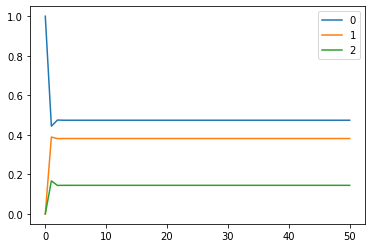

0    0.473970
1    0.381417
2    0.144613
Name: 50, dtype: float64

In [43]:
def generate_transition_matrix(l):
    """Generates a transition matrix from a list of data"""
    
    # Identify all unique elements and create an empty transition matrix
    elements = list(set(l))
    elements_len = len(elements)
    transition_matrix = [[0] * elements_len for x in range(elements_len)]

    # Create a zipped pair of each state and its next, and then a transition matrix
    for (i,j) in zip(l,l[1:]):
        transition_matrix[i][j] += 1
    for i in transition_matrix:
        if sum(i) > 0:
            i[:] = [x/sum(i) for x in i]
    
    # Print transition matrix
    for _ in transition_matrix:
        print([np.around(x, 4) for x in _])
    
    return transition_matrix, elements_len
    

def stationary_values(transition_matrix, elements_len, mmult_number = 50):
    """From a transition matrix, generate stationary values"""
    
    # Create a 1st state array
    state = np.array([[0.0] * elements_len])
    state[0][0] = 1.0
    
    # Create a state tracker
    stateHist = state
    dfStateHist = pd.DataFrame(state)
    distr_hist = [[0,0]]
    
    # Calculate stationary values
    for x in range(mmult_number):
        state = np.dot(state,transition_matrix)
        stateHist = np.append(stateHist,state,axis=0)
        dfDistrHist = pd.DataFrame(stateHist)
    svals = dfDistrHist[-1:].iloc[0]
    
    # Plot the descent to stationary
    dfDistrHist.plot()
    plt.show()
        
    return svals
    
    
transition_matrix, elements_len = generate_transition_matrix(transitions)
stationary_values(transition_matrix, elements_len)